
Load the data as a Pandas data frame and ensure that it imported correctly.

In [123]:
import pandas as pd

cars_data = pd.read_csv("/Users/theranmeadows/Desktop/dsc550datamining/week4/data/auto-mpg.csv")
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Begin by prepping the data for modeling:
 - Remove the car name column.

In [124]:
cars_data = cars_data.drop('car name', axis = 1)
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


- The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [125]:
pd.to_numeric(cars_data['horsepower'])



ValueError: Unable to parse string "?" at position 32

In [ ]:
cars_data['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [ ]:
cars_data.loc[cars_data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [128]:
cars_data['horsepower'] = cars_data['horsepower'].replace("?", 0)
cars_data['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [129]:
cars_data['horsepower'] = pd.to_numeric(cars_data['horsepower'])

In [130]:
mean_hp = cars_data['horsepower'].mean()
mean_hp = round(mean_hp)
mean_hp

103

In [132]:
cars_data['horsepower'] = cars_data['horsepower'].replace(0, mean_hp)
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


- Create dummy variables for the origin column.

In [133]:
cars_data['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [134]:
origin = pd.get_dummies(cars_data['origin'])
origin = origin.replace({True: 1, False: 0})
origin

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
393,1,0,0
394,0,1,0
395,1,0,0
396,1,0,0



Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [135]:
# correlation coefficient matrix
cars_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771762,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.839313,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893996,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771762,0.839313,0.893996,1.000000,0.860886,-0.684620,-0.411959,-0.453491
weight,-0.831741,0.896017,0.932824,0.860886,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684620,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411959,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453491,-0.581024,0.205873,0.180662,1.000000


Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

<Axes: xlabel='weight', ylabel='mpg'>

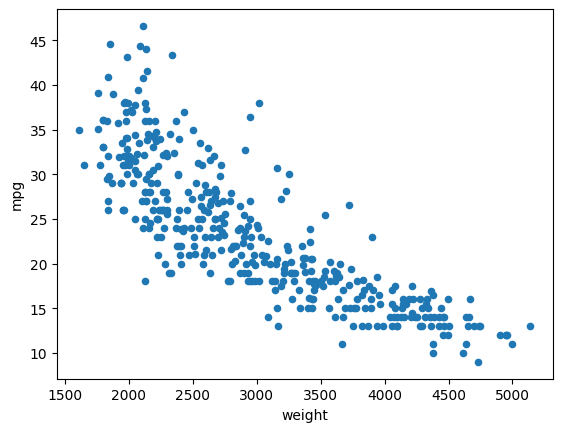

In [136]:
cars_data.plot(x = 'weight', y = "mpg", kind = 'scatter')

The Correlation coefiicient of weight and mpg is -0.83. This means that it is a negative relationship that i moderatly strong. As the weight of the car increases, generally speaking, you can say that most likey the mpg of a car will go down. 

Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [140]:
# dropping the target (mpg) column
car_lin_reg = cars_data.drop('mpg', axis = 1) 

# assigning X and y variables
X = car_lin_reg
y = cars_data['mpg']

((398, 7), (398,))

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# checking on the data splits
print("training data: ", X_train.shape, y_train.shape)
print("testing data: ", X_test.shape, y_test.shape)


training data:  (318, 7) (318,)
testing data:  (80, 7) (80,)



Train an ordinary linear regression on the training data.

In [145]:
from sklearn.linear_model import LinearRegression

# creata a linear regression model
lr = LinearRegression()

In [146]:
# fit the training data
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
# making predicitons 
y_pred = lr.predict(X_test)
y_pred.shape 

(80,)

Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [160]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# evaluating the prefomance 
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

print("R squared: ", r2)
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae )
print("Intercept: ", intercept)


R squared:  0.8641695388170476
Mean squared error:  7.652840780081275
Mean absolute error:  2.079303187226953
Intercept:  -21.114281667416822



Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

In [178]:
# Normal distribution

# https://en.wikipedia.org/wiki/Probability_density_function
# function for normal probability density function

import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(X, mu, sigma):
    return (1/ (sigma * np.sqrt( 2 * np.pi))) * np.exp((-1 / 2) * ((X - mu) / sigma) ** 2)

In [179]:
# mean mpg
mean_mpg = cars_data['mpg'].mean()

#standard deviation of M=mpg
std_mpg = cars_data['mpg'].std()

In [180]:
# probability density funtion
normal_pdf(cars_data['mpg'], mean_mpg, std_mpg)

0      0.039795
1      0.028199
2      0.039795
3      0.032152
4      0.036064
         ...   
393    0.046211
394    0.001645
395    0.028313
396    0.043292
397    0.032267
Name: mpg, Length: 398, dtype: float64

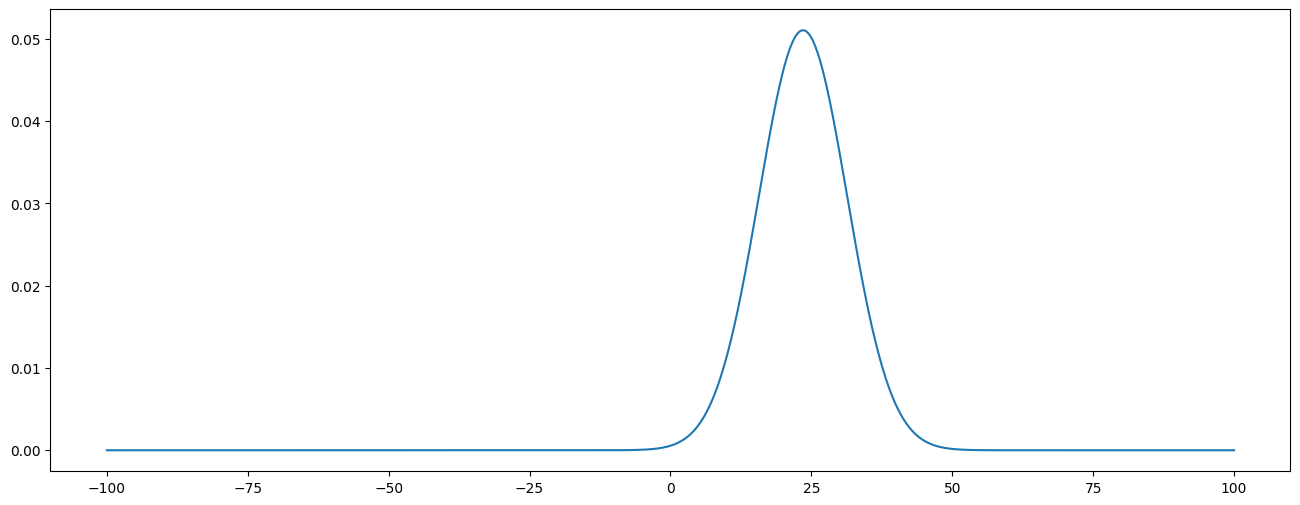

In [181]:
X = np.linspace(-100, 100, 1000)
fig, ax = plt.subplots(figsize = (16, 6))
ax.plot(X, normal_pdf(X, mean_mpg, std_mpg))

In [182]:
X_mpg = stats.norm.rvs(loc = mean_mpg, scale  = std_mpg, size = 500, random_state = 1)

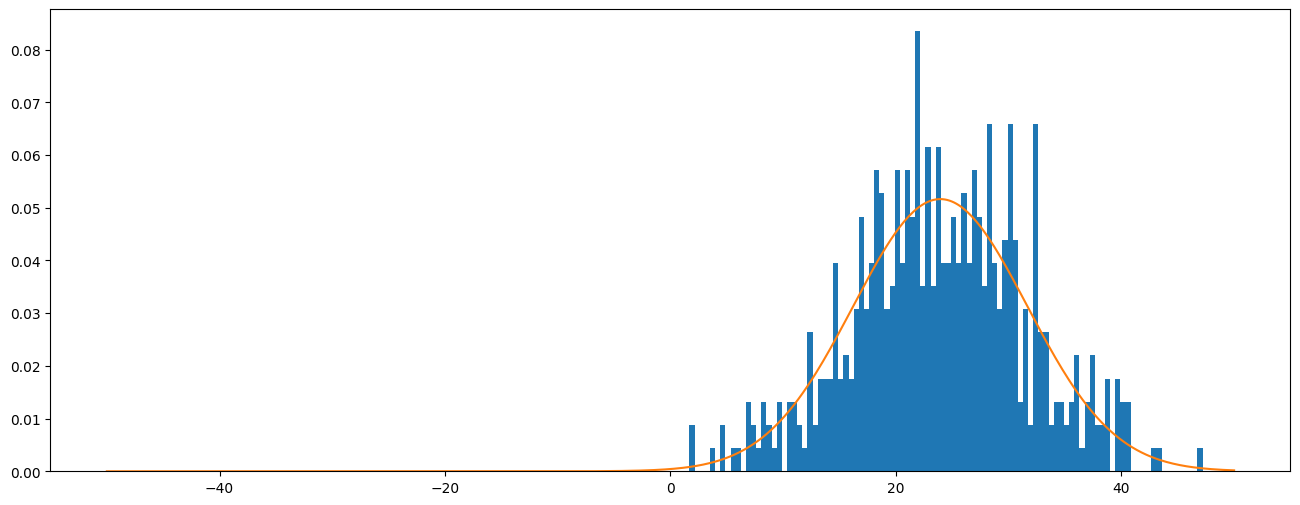

In [188]:
# superimpose a line based on parameter
mean_mpg, std_mpg = stats.norm.fit(X_mpg)
X = np.linspace(-50, 50, 500)
fig, ax = plt.subplots(figsize = (16, 6))
ax.hist(x = X_mpg, bins = 100, density = True)
ax.plot(X, stats.norm.pdf(X, loc = mean_mpg, scale = std_mpg))
plt.show()